In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [217]:
#1. Read top five values
print(df.head())


   price  sales  horsepower  fuelefficiency  length manufacturer vehicle_type
0  10000    100         150              30     180       Toyota        Sedan
1  15000    150         200              25     200        Honda          SUV
2  25000    200         250              20     220          BMW        Coupe
3  30000    250         300              18     210     Mercedes          SUV
4  12000    120         180              28     190         Ford        Truck


In [219]:
#2. Print dataframe info_data types of each column
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           5 non-null      int64 
 1   sales           5 non-null      int64 
 2   horsepower      5 non-null      int64 
 3   fuelefficiency  5 non-null      int64 
 4   length          5 non-null      int64 
 5   manufacturer    5 non-null      object
 6   vehicle_type    5 non-null      object
dtypes: int64(5), object(2)
memory usage: 412.0+ bytes
None


In [221]:
#3. Print number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")


Number of rows: 5, Number of columns: 7


In [223]:
#4. Drop duplicate rows_if any
df.drop_duplicates(inplace=True)


In [225]:
#5. Print number of rows and columns after dropping duplicates
print(f"Rows after dropping duplicates: {df.shape[0]}, Columns: {df.shape[1]}")


Rows after dropping duplicates: 5, Columns: 7


In [227]:
#6. Print summary statistics for numerical variables
print(df.describe())


             price       sales  horsepower  fuelefficiency      length
count      5.00000    5.000000    5.000000        5.000000    5.000000
mean   18400.00000  164.000000  216.000000       24.200000  200.000000
std     8677.55726   61.073726   59.413803        5.118594   15.811388
min    10000.00000  100.000000  150.000000       18.000000  180.000000
25%    12000.00000  120.000000  180.000000       20.000000  190.000000
50%    15000.00000  150.000000  200.000000       25.000000  200.000000
75%    25000.00000  200.000000  250.000000       28.000000  210.000000
max    30000.00000  250.000000  300.000000       30.000000  220.000000


In [229]:
#7. Print number of missing values in each column
print(df.isnull().sum())


price             0
sales             0
horsepower        0
fuelefficiency    0
length            0
manufacturer      0
vehicle_type      0
dtype: int64


In [231]:
#8. Drop the column with most missing values
df['missing_col'] = np.nan
df.drop(columns=['missing_col'], inplace=True)


In [233]:
#9. Drop the rows with categorical missing values
df.dropna(subset=['manufacturer'], inplace=True)


In [285]:
#10. Import the rows with numerical missing values
df.fillna(df.mean(), inplace=True)

In [237]:
#11. Sort the data w.r.t price_find the details of the most
and the least expensive cars
df_sorted = df.sort_values(by='price')
print(df_sorted.iloc[-1])  # Most expensive
print(df_sorted.iloc[0])   # Least expensive


price                30000
sales                  250
horsepower             300
fuelefficiency          18
length                 210
manufacturer      Mercedes
vehicle_type           SUV
Name: 3, dtype: object
price              10000
sales                100
horsepower           150
fuelefficiency        30
length               180
manufacturer      Toyota
vehicle_type       Sedan
Name: 0, dtype: object


In [239]:
#12. Write a function to find min and max values of any column
def find_min_max(column):
    return df[column].min(), df[column].max()

print(find_min_max('horsepower'))
print(find_min_max('length'))
print(find_min_max('fuelefficiency'))


(150, 300)
(180, 220)
(18, 30)


In [241]:
#13. Call the above function to find min max of horse
power, length, fuel efficiency
print(find_min_max('horsepower'))
print(find_min_max('length'))
print(find_min_max('fuelefficiency'))


(150, 300)
(180, 220)
(18, 30)


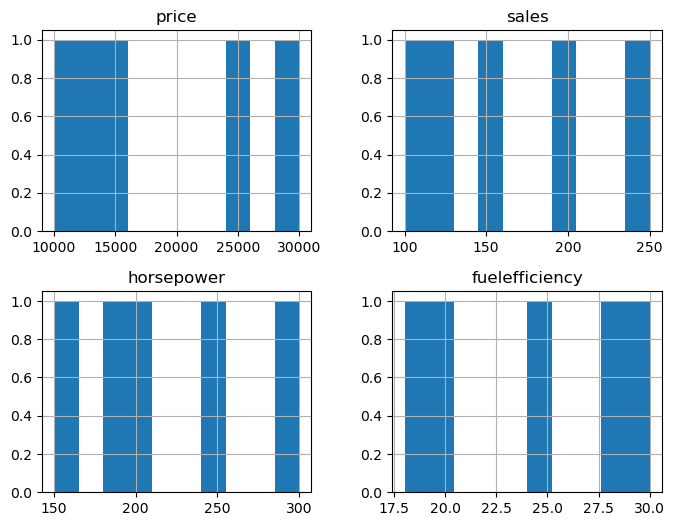

In [243]:
#14. Plot histogram of continuous numerical variable :
price,sales,hoursepower,fuelefficiency
df[['price', 'sales', 'horsepower', 'fuelefficiency']].hist(figsize=(8, 6))
plt.show()


/tmp/ipykernel_8943/2420912362.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['length'], shade=True)


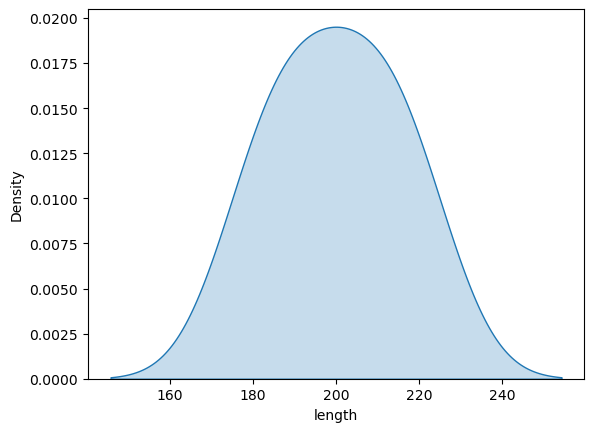

In [245]:
#15. Probability density distribution of continuous
numerical variable-length
sns.kdeplot(df['length'], shade=True)
plt.show()


In [247]:
#16. Count by category –group by manufacture
print(df.groupby('manufacturer').size())


manufacturer
BMW         1
Ford        1
Honda       1
Mercedes    1
Toyota      1
dtype: int64


In [249]:
#17. Select all numerical variables
print(df.select_dtypes(include=[np.number]))


   price  sales  horsepower  fuelefficiency  length
0  10000    100         150              30     180
1  15000    150         200              25     200
2  25000    200         250              20     220
3  30000    250         300              18     210
4  12000    120         180              28     190


In [251]:
#18. Print correlation coefficient value of price and sales
print(df['price'].corr(df['sales']))


0.9915641497628355


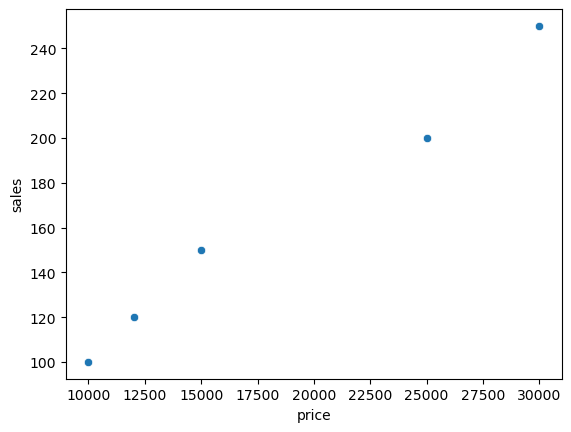

In [253]:
#19. Plot correlation of price and sales using scatterplot
sns.scatterplot(x='price', y='sales', data=df)
plt.show()


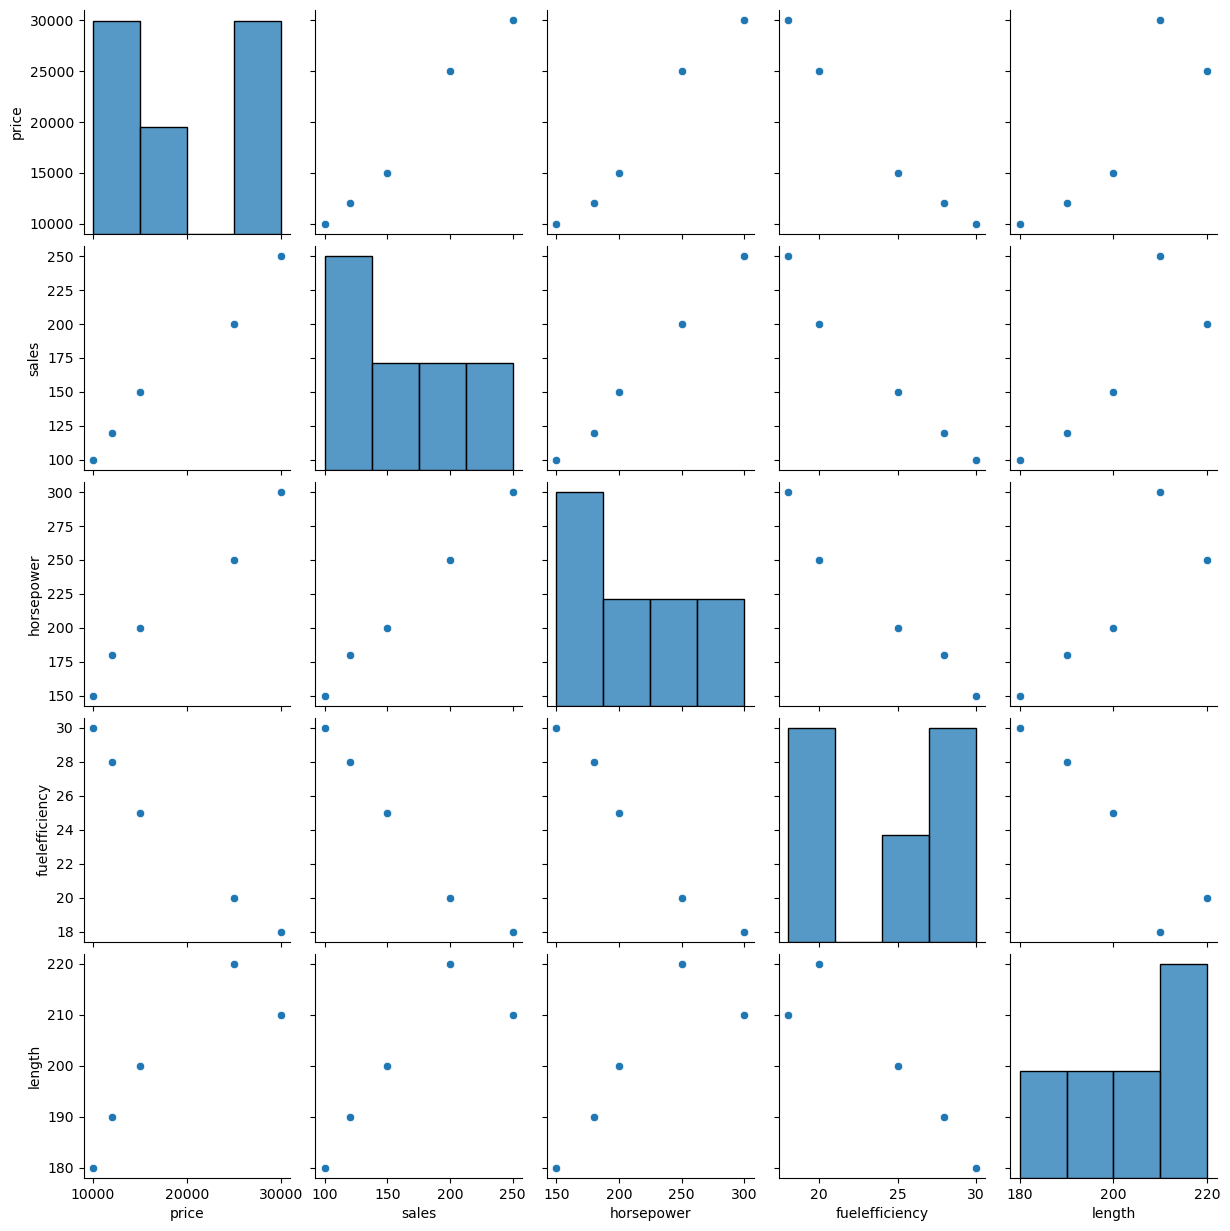

In [255]:
#20.Pair plot
sns.pairplot(df)
plt.show()


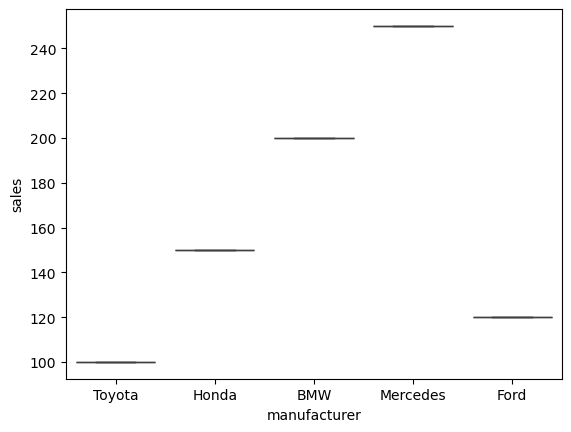

In [257]:
#21. Boxplot of sales of different manufacturer
sns.boxplot(x='manufacturer', y='sales', data=df)
plt.show()


In [292]:
# **22. Boxplot of other numerical variables w.r.t manufacturer**
# Plot boxplots of numerical variables ('sales', 'horsepower', 'price', 'fuelefficiency') with respect to 'manufacturer'
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the dataframe with the correct data
sns.boxplot(data=df[['sales', 'horsepower', 'price', 'fuelefficiency']], x=df['manufacturer'])
plt.title('Boxplot of Numerical Variables with respect to Manufacturer')
plt.show()


KeyError: "['price'] not in index"

In [259]:
#23. Divide the data into input and output y=sales in
thousand, x=all other variables
sns.boxplot(data=df[['sales', 'horsepower', 'price', 'fuelefficiency']], x='manufacturer')
plt.show()


ValueError: Could not interpret value `manufacturer` for `x`. An entry with this name does not appear in `data`.

In [261]:
#24. Encode other categorical variables using label encoder
X = df.drop(columns=['sales'])
y = df['sales']


In [1]:
#25. Encode categorical variable vehicle type using one-hot
encoder
label_encoder = LabelEncoder()
df['manufacturer'] = label_encoder.fit_transform(df['manufacturer'])
df['vehicle_type'] = label_encoder.fit_transform(df['vehicle_type'])


NameError: name 'encoder' is not defined

In [3]:

df = pd.get_dummies(df, columns=['vehicle_type'], drop_first=True)


NameError: name 'pd' is not defined

In [5]:
#26.Split the data set into train and test set 70% train set 10% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NameError: name 'train_test_split' is not defined

In [269]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: 'BMW'

In [294]:
# **27. Apply feature scaling on numerical variables**
# Apply standard scaling to the numerical features in the dataset
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test are the features and are pre-split from the dataframe
scaler = StandardScaler()

# Apply scaling to both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output to show the scaled features
print("Scaled training data (first 5 rows):\n", X_train_scaled[:5])
print("\nScaled testing data (first 5 rows):\n", X_test_scaled[:5])


ValueError: could not convert string to float: 'BMW'